In [73]:
import torchaudio as ta
import torch
import noisereduce as nr
import torch as tr
import matplotlib.pyplot as plt

In [75]:
x1, sr = ta.load('../normalized/sensor_1.wav')
x2, sr = ta.load('../normalized/sensor_2.wav')
x3, sr = ta.load('../normalized/sensor_3.wav')
x_test = ta.load('../normalized/test_rec.wav')
N = len(x1)

X = tr.concat([x1, x2, x3], dim=0)

X = ta.functional.lowpass_biquad(X, sr, 3500)
X = ta.functional.highpass_biquad(X, sr, 80)

N_FFT = 1024
N_HOP = 256
spec = ta.transforms.Spectrogram(
    n_fft=N_FFT,
    hop_length=N_HOP,
    power=None,
)
ispec = ta.transforms.InverseSpectrogram(n_fft=N_FFT, hop_length=N_HOP)

X = spec(X[:, len(x1)//2:])


In [ ]:
def plot_spectrogram(stft, title="Spectrogram"):
    magnitude = stft.abs()
    spectrogram = 20 * torch.log10(magnitude + 1e-8).numpy() # to dB
    figure, axis = plt.subplots(1, 1)
    img = axis.imshow(spectrogram, cmap="viridis", vmin=-100, vmax=0, origin="lower", aspect="auto")
    axis.set_title(title)
    plt.colorbar(img, ax=axis)

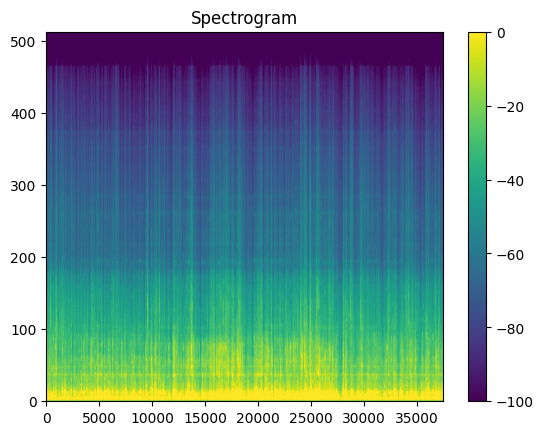

In [76]:
plot_spectrogram(X[0,:])

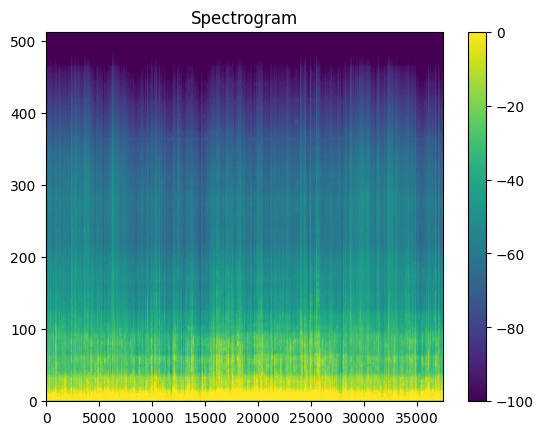

In [77]:
plot_spectrogram(X[1,:])

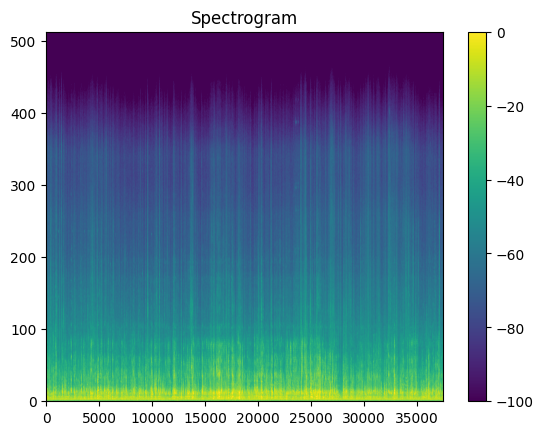

In [78]:
plot_spectrogram(X[2,:])

In [ ]:
wav = ispec(x1) + ispec(x2) + ispec(x3)

print(wav)

ta.save('output.wav', wav, sr)

tensor([[0.0124, 0.0087, 0.0080,  ..., 0.0007, 0.0019, 0.0021]])
